# Simulating Rutherford Scattering
## Freddie Nunn
### Eton College Computational Physics Prize 2022
***

## 1. Introduction
***
### 1.1 History of Rutherford Scattering
Rutherford Scattering is a phenomenon first explained by Ernest Rutherford in 1911; it describes the scattering of charged particles due to the Coulomb Interaction (force between charged particles). The phenomenon was first tested by Hans Geiger and Ernest Marsden in 1909 using the gold foil experiment, shown below:

<img src="images/Hnet.com-image.png" alt="Gold Foil Diagram" style="width:400px;">

The experiment consisted of bombarding a thin gold foil with alpha particles from a radium source, and measuring the angle it comes out with a fleorescent screen. At the time, the most widely accepted model of an atom was Thomson's 'plum pudding' model, which describes an atom as a sperical region of positive charge with negative particles scattered inside. According to this model, the particles should pass through the atoms with very little deflections in their path, as there is no large concentration of charge to deflect the particles. They found most particles went through without much deflection, as expected, but a few particles were deflected very large angles. This was not explained until Rutherford published his paper in 1911 detailing the Rutherford model of the atom, which consists of a small positive densely charged area in the center of the atom called the nucleus, orbited by negative particles. This explained the experiment's behaviour, as a small amount of the alpha particles would get very close to the nucleus, exerting a large force on the alpha particle, in turn causing a large deflection. This model is very similar to the one used today, and was a big leap for particle physics.


### 1.2 The Physics of Rutherford Scattering

Rutherford scattering is a direct consequence of Coulombs Law, which describes the force between charged objects.
$$ {F = -\frac {1}{4\pi \epsilon_{0}}\frac {q_{1}q_{2}}{r^{2}}} $$
Where $F$ is the force on the object in the direction of the other object, $\epsilon_{0}$ is the permutivity of a vacuum, $q_{1}$ and $q_{2}$ are the charges of the objects, and $r$ is the distance between them. The main consequences of this in this context are:
1. The force between the particles increases as they get closer
2. the direction of the force on the alpha particle is directly away from the nucleus.

These 2 factors result in a behaviour where most of the particles' trajectories are fairly unchanged, since they don't get close enough to a nucleus for the force to be significant, but a few particles that get close enough to the nucleus are pushed away, changing their trajectory drastically. This change in trajectory is what Rutherford measured to create his atom model, and is what I will be attempting to recreate.

## 2. Model Overview
***
The aim of this model is to model Rutherford Scattering by simulating the Gold Foil experiment that Geiger and Marsden performed. I will then measure the distribution of scattering angles, and compare it to real data to check its accuracy.

### 2.1 Factors to Consider

In order to create as accurate a model as possible, I will need to consider all factors that could affect the scattering angle, and decide whether to include them in my model or not.

#### 2.1.1 Included Factors


##### Material and Lattice Structure

In the original experiment, they fired the alpha particles at a thin leaf of gold lattice a few atoms thick. However, in Rutherford's paper he repeated the experiment with multiple different materials, to verify the scattering effect with different materials and investigate the effect of different atom weights and sizes. In my model, varying the material is much easier than Rutherford's experiment, and is just a question of different numbers. My final model will also use a 3 Dimensional lattice  to be as accurate as possible, but I will also model a single atom and a 2 Dimensional lattice on the way, as they are easier and allow me to more closely invesigate specific parts of the model.

##### Alpha Particle Velocity

The velocity of the alpha particles directly affects the angle of deflection, as the faster the particle is, the less time it spends close to the nucleus and so it will be pushed less. In Rutherford's experiments, he used a radium source to emit alpha particles with a random distribution of velocities. However, I will use a constant velocity for all of the alpha particles. While this means the results may slightly differ from Rutherford's, it also means the results will be more accurate, as each particle from the same position will be deflected the same amount; A luxury unavailable to Rutherford at the time.

##### Effect of Force on Nucleus

The Coulomb Force acts on both particles involved, and so the nucleus will also feel a repulsive force from the alpha particle. This creates a small 'recoil' in the nucleus, which can affect the deflection angle. I will take the same approach as with the lattice structure, by implementing it once I have a basic model completed.

#### 2.1.2 Exluded Factors

##### Quantum Mechanics

I will be using the classical physics for this model. In reality, at this microscopic level quantum physics starts to take over, which could affect the results. However, these behaviours are very hard to computationally model, so I will leave them out of this.

##### Relativistic Effects

According to Einstein's Special Relativity, an object's mass is affected by its velocity by a factor of $\frac {1}{\sqrt {1 - \frac {v^{2}}{c^{2}}}}$, where $v$ is the object's velocity and $c$ is the speed of light in a vacuum. To decide whether to include this in my model, I calculated the speed of an alpha particle being emitted from a radium source. The alpha particles emitted have ~5.6 MeV of energy, and using $KE = \frac {1}{2}mv{2}$ and a mass of 4u, I found the speed to be ~$1.6\times10^{7} m s^{-1}$. I then calculated the relativistic mass using the factor stated earlier, and I got $6.7\times10^{-27}kg$. Finally, I calculated the % change of mass using the following formula:
$$ \frac {m_{rel} - m}{m} \times 100\% $$
Where $m$ is the standing mass and $m_{rel}$ is the relativistic mass, and got 0.15% change. This shows that at these speeds, the change in mass is neglegable, and I can safely assume the particles do not feel these relativistic effects in my model, without significantly affecting the results.

##### Charge Distribution in Particles

In my model, I will assume charge is distributed uniformly within the particles. In reality, this is not true, as charge is contained in discreet protons within the nucleus. However, Coulomb's Law only works with point charges or uniformly distributed charge in a sphere, and so this assumption must be made for the model to hold up. Once I have completed the model, I may be able to depict this accurately by considering the Coulomb force from each proton in a nucleus, increasing the accuracy of the results.

### 2.2 Model Breakdown

#### 2.2.1 Parameters

The parameters for this model can be split into 3 main categories: alpha particle, Nucleus, and simulation parameters.

##### Alpha Particle

- $Q_{1}$: Charge of the particle
- $m_{\alpha}$: Mass of the particle
- $u$: Initial speed

The mass and charge of the particle will be based off the actual alpha particle values. Initial speed will be chosen to follow Geiger and Marsdon's original experiment as similarly as possible.

##### Nucleus

- $Q_{2}$: Charge of the nucleus
- $m_{n}$: Mass of the nucleus
- $r_{n}$: radius of the nucleus

The mass, charge and radius will be decided by the material being used. This will be gold for most of the simulation to correlate with the original experiments.

##### Simulation

- $a$: Activity of the source
- $r_{max}$: radius of source
- $n$: number of alpha particles
- $l$: Length of lattice
- $t$: thickness
- $d$: Distance from source to lattice

the activity decides the chance an alpha particle is created and will be based off the radium source used in the original experiment. The radius of the source determines the size of the area from wherer the alpha particles are emitted. The number of alpha particles is the total number emitted, and so determines how long the simulation will take and how accurate the results will be. The length and thickness of the lattice decide the size of the lattice that the alpha particles will be fired into. The distance between source and lattice decides both how far away alpha particles are when they are created, and the distance from the lattice at which their scattering angle should be measured. 

#### 2.2.2 The Simulation

This describes the oultine of the simulation process.

1. Initialize the atoms with positions according to the lattice shape and size, and values according the the material being used.
2. Choose whether to create an alpha particle or not randomly, according to the activity.
   - If an alpha particle is created, initialize it with a position randomly on a 2D plane representing the source.
3. Calculate the net force on each alpha particle by combining the force from each nucleus.
4. Move forward a fixed timestep and change the alpha particles accordingly.
5. If an alpha particle is over $d$ distance from the closest nucleus, measure its scattering angle, and delete the particle.
6. repeat steps 2-5 until $n$ alpha particles have been created and deleted.

## 3. Algorithm Details
***
Here I will go over the details and mathematics involved with the algorithms I will create.
### 3.1 Distance and Force

The core algorithms in this model are calculating the distance and force between particles. This forms the basis of how Rutherford Scattering work.

Distance is calculated using the Euclidean Distance formula between 2 vectors A and B:
$$ r = \sqrt{(x_{A}-x_{B})^{2}+(y_{A}-y_{B})^{2}+(z_{A}-z_{B})^{2}} $$
and force can be calculated using Coulomb's Law.
$$ {|F| = \frac {Q_{A}Q_{B}}{4\pi \epsilon_{0}r^{2}}} $$
This gives us the magnitude of the force, but we then need to calculate the force vector. Since both we know both particles will always be positive, the direction of the force must be directly away from the other particle. Therefore for a force on A, the direction is:
$$ \vec{BA} = \begin{pmatrix} x_{A}-x_{B} \\ y_{A}-y_{B}  \\  z_{A}-z_{B} \end{pmatrix} $$
We can now calculate the force vector.
$$ F =  \lambda\times\vec{BA} $$
$$ |F| =  \lambda|\vec{BA}| $$
$$ F = \frac{|F|}{|\vec{BA}|}\times \vec{BA} $$

##### 3.1.1 Net Force
Calculating the net force is as simple as adding up the forces from all particles.
$$ \sum F = \sum_{i}\begin{pmatrix} x_{i} \\ y_{i}  \\  z_{i} \end{pmatrix} $$




### 3.2 Update Position and Velocity

I used a time integration method to update position and velocity in discrete chunks of time. To do this, I used the Kinematic equations:
$$ v(t+\Delta t) = v(t) + a(t)\Delta t $$
$$ x(t+\Delta t) = x(t) + v(t+\Delta t)\Delta t $$
Position and velocity will both have starting values, and acceleration is calculated using $a=F/m$, where $F$ is the net force on the particle. $\Delta t$ refers to the timestep, which will be calculated in a seperate algorithm. I am using a semi-implicit method, where the velocity from after the timestep is used to update the position; this is more accurate than the explicit method of using the current velocity. You will notice a fully implicit method where the acceleration from after the timstep is used to update the velocity is not possible, as the position after the timestep is needed for this, which we do not have. Therefore, the equations to update velocity and position are as follows:
$$ v_{n+1} = v_{n} + \frac{\sum F}{m}\Delta t $$
$$ x_{n+1} = x_{n} + v_{n+1}\Delta t $$

#### 3.2.1 Calculate Timestep
The value of the timestep I use directly affects the efficiency and accuracy of the program. Smaller timesteps give more accurate results, but are slower. To improve efficiency and accuracy, I used a variable timstep method, where the timstep is proportional to the smallest distance from particle to nuclei. I also introduced a maximum and minimum timestep to ensure accuracy and efficiency. Using trial and error, I landed on $10^{14}$ and $10^{23}$ for the min and max respectively, and $10^{-9}$ for the proportional constant.
$$ \Delta t=max(min(d\times 10^{-9}, 10^{-14}), 10^{-23}) $$

### 3.3 Calculate Angle
To calculate the total angle a particle has been deflected by, we can use the equation for the dot product:
$$ A \cdot B = |A||B|cos(\theta) $$
where A and B are vectors, and $\theta$ is the angle between them. since the direction of the velocity vector of a particle represents the direction it is travelling, the angle btween the initial velocity and the final velocity represents the deflection angle. Thus, we can calculate the deflection angle as follows:
$$ \theta = cos^{-1}(\frac{V_{0} \cdot V_{f}}{|V_{0}||V_{f}|}) $$
Where $V_{0}$ is the initial velocity and $V_{f}$ is the final velocity.

### 3.4 Lattice creation

#### 3.4.1 Single Nucleus
To create a single nucleus, a particle with 0 speed is initialized at point $(0, 0, d)$.

#### 3.4.2 2D & 3D Lattice
The gold lattice is arranged in a face-centered cubic lattice; this is where the lattice is made of multiple unit boxes stacked together, each box having a particle at each corner and the centre of each face, as shown.

<img src="images/FaceCentredCubic.png" alt="Gold Foil Diagram" style="width:400px;">

The length, $a$, of the unit cube is determined by the weight and density of the material. since $\rho = m/V$, the side length of the unit cube can be determined as $a = \sqrt[3]{m/\rho}$. Since there are 4 full atoms in the cube (8 lots of 1/8 atoms in the corners, 6 lots of 1/2 atoms at the faces), the side length can be determined.
$$ a = \sqrt[3]{4m/\rho} $$
Where $m$ is the mass of 1 atom of the material, and $\rho$ is the density of the material.

### 3.5 Handling Particles

#### 3.5.1 Particle Creation
At each timestep, there is a chance an alpha particle is created based of the activity of the source. This probability is represented by $a \Delta t$, where $a$ is the activity and $\Delta t$ is the timestep.
If a particle is created, it is given a random coordinate on the x-y plane. This is generated as follows:
$$ r = \begin{pmatrix} R \cos(\Theta) \\  R \sin(\Theta)  \\  0 \end{pmatrix} $$
Where $R$ is a uniformly distributed random variable between 0 and $r_{max}$, and $\Theta$ is a uniformly distributed random variable between 0 and $2\pi$.

#### 3.5.2 Particle Deletion
The particle is deleted when it is at least $d$ distance from the closest nucleus. At this point, the angle is calculated and stored, and then the particle is deleted.

## 4. The Model
***

### 4.1 The Code

In [29]:
# Establishing dependencies

import numpy as np
import numpy.random as rand
from enum import Enum
import pickle

# set seed to ensure repeatability
rand.seed(1)

# setup of Particle class
class Particle:
    """
    Particle class

    Constants:
        E0: permittivity of free space
        u: mass of a nucleon
        e: elementary charge

    INIT:
        Parameters:
            mass: relative mass of the particle
            charge: relative charge of the particle
            position: starting position of the particle
            velocity: starting velocity of the particle

        Attributes:
            mass: mass of the particle in kg
            charge: charge of the particle in coulombs
            position: starting position of the particle
            velocity: starting velocity of the particle
            initialVel: initial velocity of the particle
            initialOffset: distance from (0, 0, 0) as start

    """

    E0 = 8.85e-12
    u = 1.66e-27
    e = 1.602e-19

    def __init__(self, mass: float, charge: float, position: np.array, velocity: np.array):

        self.mass = mass*self.u
        self.charge = charge*self.e
        self.position = position
        self.velocity = velocity
        self.initialVel = np.array(velocity)
        self.initialOffset = np.linalg.norm(position)

    def distance(self, particle):
        """calculates distance between given particle and self

        Args:
            particle ([Particle]): a single particle

        Returns:
            Float: distance
        """
        return np.linalg.norm(self.position-particle.position)
    
    def minDistance(self, particles):
        """calculates minimum distance from a set of nuclei

        Args:
            particles ([Particle]): array of nuclei

        Returns:
            Float: minimum distance
        """
        return min([np.linalg.norm(self.position-particle.position) for particle in particles])

    def attraction(self, particle):
        """calculates magnitude of force from a particle on self

        Args:
            particle (Particle): single nuclei

        Returns:
            Float: magnitude of electric force
        """
        return (self.charge*particle.charge)/(4*np.pi*self.E0*(self.distance(particle)**2))

    def netForce(self, particles):
        """calculates net force on particle as a vector

        Args:
            particles ([Particle]): array of nuclei

        Returns:
            np.array: force on the particle as a vector
        """
        force = np.zeros(3)
        for particle in particles:
            forceMag = self.attraction(particle)
            direction = self.position-particle.position
            force += (forceMag/np.linalg.norm(direction))*direction

        return force
    
    def updatePosVel(self, particles, TIMESTEP):
        """updates the particle's position and velocity after a given timestep

        Args:
            particles ([Particle]): array of nuclei
            TIMESTEP (_type_): change in time
        """
        a = self.netForce(particles)/self.mass
        self.velocity += a*TIMESTEP
        self.position += self.velocity*TIMESTEP
    
    def calcTimeStep(self, particles):
        """calculates timestep for the particle

        Args:
            particles ([Particle]): array of nuclei

        Returns:
            Float: timestep
        """
        dist = min([self.distance(particle) for particle in particles])
        return max(min((dist*1e-9),1e-14), 1e-23)
    
    def calcAngle(self):
        """calculates deflection angle from when it was initialized

        Returns:
            Float: deflection angle
        """
        dot = np.dot(self.velocity, self.initialVel)
        angle = np.arccos(dot/(np.linalg.norm(self.velocity)*np.linalg.norm(self.initialVel)))
        return np.degrees(angle)

# Enum for different particles
class ParticleType(Enum):
    """
    Values:
        m: relative mass of particle
        q: relative charge of particle
        u: initial speed of particle
        dens: density of material
    """

    ALPHA = {
        "m": 4,
        "q": 2,
        "u": 1.9e7
        }
    GOLD = {
        "m": 197,
        "q": 79,
        "dens": 19300
        }
    LEAD = {
        "m": 207,
        "q": 82,
        "dens": 11342
    }
    TIN = {
        "m": 118.7,
        "q": 50,
        "dens": 5750
    }


# setup of RutherfordSystem class
class RutherfordSystem:
    """
    INIT:
        Parameters:
            activity: activity of the alpha source
            rMax: maximum offset from center for the alpha particles
            l: length of the nuclei array
            t: thickness of the nuclei array
            d: distance from source to nuclei
            particleType: particle type of source particle
            nucleusType: particle type of the nuclei
        Attributes:
            particleType: particle type of source particle
            d: distance from source to nuclei
            l: length of the nuclei array
            t: thickness of the nuclei array
            nuclei: array of nuclei lattice
            activity: activity of the alpha source
            rMax: maximum offset from center for the alpha particles
            timestep: variable amount of time for each step

    """

    def __init__(self, activity, rMax, l, t, d, particleType: ParticleType, nucleusType: ParticleType):
        self.particleType = particleType
        self.d = d
        self.l = l
        self.t = t
        self.nuclei = self.createLattice(l, t, d, nucleusType)
        self.activity = activity
        self.rMax = rMax
        self.timeStep = 0
    
    def unitBoxLength(self, nucleusType):
        """calculate the length of the unit box of the given particle lattice

        Args:
            nucleusType (ParticleType): type of particle in the lattice

        Returns:
            Float: unit box length
        """
        vol = (4*nucleusType.value["m"]*Particle.u)/nucleusType.value["dens"]
        return vol**(1/3)
    
    def createLattice(self, length, t, d, nucleusType):
        """returns either single nuclei, 2D lattice of 3D lattice based on the length and thickness of the lattice

        Args:
            length (Float): length of the lattice
            t (Float): thickness of the lattice
            d (Float): Distance of lattice from source
            nucleusType (ParticleType): type of particle in the lattice

        Returns:
            [Particle]: Array of nuclei on lattice
        """
        if length == 0:
            return [Particle(nucleusType.value["m"], nucleusType.value["q"], np.array([0., 0., d]), np.array([0., 0., 0.]))]
        elif t == 0:
            # Create 2D lattice
            nuclei = []
            boxLen = self.unitBoxLength(nucleusType)
            xPos = -length/2
            yPos = -length/2
            layerOffset = False
            while yPos <= length/2:
                while xPos <= length/2:
                    nuclei.append(Particle(nucleusType.value["m"], nucleusType.value["q"], np.array([xPos, yPos, d]), np.array([0., 0., 0.])))
                    xPos += boxLen
                yPos += boxLen
                layerOffset = not layerOffset
                if layerOffset:
                    xPos = (boxLen-length)/2
                else:
                    xPos = -length/2

            return nuclei
        else:
            #  Create 3D lattice
            nuclei = []
            boxLen = self.unitBoxLength(nucleusType)
            xPos = -length/2
            yPos = -length/2
            zPos = self.d
            xlayerOffset = False
            zlayerOffset = False
            while zPos <= (self.d + t):
                while yPos <= length/2:
                    while xPos <= length/2:
                        nuclei.append(Particle(nucleusType.value["m"], nucleusType.value["q"], np.array([xPos, yPos, zPos]), np.array([0., 0., 0.])))
                        xPos += boxLen
                    yPos += boxLen
                    xlayerOffset = not xlayerOffset
                    if xlayerOffset:
                        xPos = (boxLen-length)/2
                    else:
                        xPos = -length/2
                zPos += boxLen/2
                zlayerOffset = not zlayerOffset
                xlayerOffset = zlayerOffset
                yPos = -length/2
                if xlayerOffset:
                    xPos = (boxLen-length)/2
                else:
                    xPos = -length/2
            return nuclei
    
    def changeNucleus(self, nucleusType):
        """Changes the type of nucleus particle
        
        Args:
            nucleusType (ParticleType): the type of nucleus to be changed to
        """
        self.nuclei = self.createLattice(nucleusType=nucleusType, length=self.l, t=self.t, d=self.d)
    
    def newParticle(self, pos):
        """Creates new particle to be emitted from source

        Args:
            pos (np.array): initial position of particle

        Returns:
            Particle: new particle
        """
        return Particle(mass=self.particleType.value["m"], charge=self.particleType.value["q"],  position=pos, velocity=np.array([0., 0., self.particleType.value["u"]]))
    
    def randomPoint(self):
        """Creates random starting position for new particles within rMax

        Returns:
            np.array: starting position
        """
        theta = rand.uniform(0,2*np.pi, 1)
        radius = rand.uniform(0,self.rMax, 1)
        return np.array([(radius*np.cos(theta))[0], (radius*np.sin(theta))[0], 0.])
    
    def singleSim(self, b):
        """Simulation of a single alpha particle being emitted

        Args:
            b (Float): initial offset from centre of lattice

        Returns:
            [np.array]: array of positions at each timestep
            Float: final deflection angle
        """
        alpha = self.newParticle(np.array([b, 0., 0.]))
        positions = np.array([alpha.position])
        dist = alpha.minDistance(self.nuclei)
        while alpha.minDistance(self.nuclei) <= dist:
            self.timeStep = alpha.calcTimeStep(self.nuclei)
            alpha.updatePosVel(self.nuclei, self.timeStep)
            positions = np.concatenate(([alpha.position], positions))
        return {"positions": positions, "angle": alpha.calcAngle()}

    def multiSim(self, num):
        """Simulation of a set number of alpha particles being emitted

        Args:
            num (Int): number of alpha particles to be emitted

        Returns:
            [Float]: array of deflection angles of each particle
            [Float]: initial offset of each particle
        """
        alphaCount = 1
        alphas = [self.newParticle(self.randomPoint())]
        angles = []
        offsets = []
        while alphaCount < num or len(alphas) != 0:
            timeStep = np.inf
            for alpha in alphas:
                timeStep = min(timeStep, alpha.calcTimeStep(self.nuclei))
            
            for alpha in alphas:
                alpha.updatePosVel(self.nuclei, timeStep)
                if alpha.minDistance(self.nuclei) > np.linalg.norm(np.array([self.d, self.rMax])):
                    angles.append(alpha.calcAngle())
                    offsets.append(alpha.initialOffset)
                    alphas.remove(alpha)

            if rand.rand(1)[0] < self.activity*timeStep and alphaCount < num:
                alphas.append(self.newParticle(self.randomPoint()))
                alphaCount += 1

        return {"angles": angles, "offsets": offsets}


### 4.2 Usage

The main class is the RutherfordSystem class. This takes the following inputs.
- activity: this determines how often alpha particles are emitted
- rMax: this is the maximum distance from the centre alpha particles are emitted. They are emitted uniformly within the circle of rMax radius.
- l: this is the length of the lattice. a square is created with l side length. If l is 0, a single atom in the centre is created.
- t: this is the thickness of the lattice. If it is 0, a 2D lattice is created.
- d: this is the distance from the lattice the alpha particles are emitted from.
- particleType: the type of emitted particle. Always alpha in our case.
- nucleusType: the type of nucleus in the lattice. Normally gold.

The main methods in this class are singleSim and multiSim. singleSim simulates a single particle emitted, and takes 1 parameter b, the impact parameter (explained later). multiSim simulates multiple particles being emitted from random positions within rMax. It takes 1 parameter num, the number of particles emitted.

#### 4.2.1 Units

Nearly everything in this model is measured in SI units. The expections to this is the inputs for mass and charge, which are measured in atomic mass units (u) and elementary charge (e) respecively. However, these are converted to SI units on instantiation of the object.

## 5. Data Analysis
***

### 5.1 Single Atom

To test the accuracy of the model, the first and simplest simulation to perform is that of a single gold atom. To create a single atom model, simply set the length of the lattice to 0.

The major equation we can prove with our model is the equation linking the impact parameter, $b$, with the scattering angle, $\theta$, as shown in the diagram.

<img src="images/impactParam.png" alt="impact parameter diagram" style="width:700px;">

These 2 values are linked with the following equation:
$$ b(\theta) = \frac{zZe^{2}}{4\pi \epsilon_{0} mv_{0}^{2}}\cot(\frac{\theta}{2}) $$
- $b(\theta)$: impact parameter
- $\theta$: scattering angle
- $z$: charge of alpha particle as a multiple of $e$
- $Z$: charge of nucleus as a multiple of $e$
- $m$: mass of the alpha particle
- $v_{0}$: initial speed of the alpha particle

##### Initial Speed

  As a quick interlude, we will work out what the initial speed of the alpha particle was in the original experiment, so we can use it in our model. Geiger and Marsden used a radium source to produce radon-222 gas, which emitted the alpha particles. radon-222 decays to polonium-218. From this we can calculate the gained energy of the alpha particle. Using $E=mc^{2}$, the gained KE is calulated:
  $$ \Delta KE = M_{r}c^{2} - (M_{p}+M_{\alpha})c^{2} $$
  Where $M_{r}$ is the mass of radon-222, $222.0175763u$, $M_{p}$ is the mass of polonium-218, $218.0089730u$, and $M_{\alpha}$ is the mass of an alpha particle, $4.001506179127u$. From this, we get a change in energy of $~6.6MeV$.
  Finally, using the equation $KE = \frac{1}{2}mv^{2}$ and our value for mass of the alpha particle, we get a speed of $1.9\times 10^{7}ms^{-1}$. This is also stored in the ParticleType enum.

Now that we know the initial speed, we can plug the known values in to get the following relationship:

$$ b(\theta) = K\cot(\frac{\theta}{2}) $$
where $K = 1.52142\times 10^{-14}$.

Now, we can run the simulation and compare it to this relationship.

The relevant data values for the gold atom and alpha particle are already stored in the ParticleType enum. The rest of the data is determined as follows.

- activity: $3.7\times 10^{9}$
  - The same as the activity of the radium in the original gold foil experiment.
- rMax: 1e-12
  -  This is arbitrarily chosen, and only affects the spread of the results.
- l: 0
  - l is 0 for single atom model
- t: 0
  - same as above
- d: 1e-6
  - also arbitrarily chosen to balance accuracy and speed.

We will simulate 5000 particles being emitted.

In [367]:
goldAtom = RutherfordSystem(activity=3.7e9, 
                            rMax=1e-12, 
                            l=0, 
                            t=0, 
                            d=1e-6, 
                            particleType=ParticleType.ALPHA, 
                            nucleusType=ParticleType.GOLD)

                            
results = goldAtom.multiSim(5000)

#### 5.1.1 Results

##### Scattering Distribution

First, we can check if the scattering angles fits with Rutherford's experiments; that is, most particles have a very small angle, but a small amount scatter across a large angle.

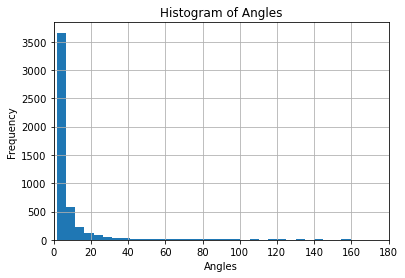

In [368]:
import matplotlib.pyplot as plt
%matplotlib inline

hist = plt.hist(results["angles"], 36)
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('Histogram of Angles')
plt.xlim(0, 180)
plt.grid(True)

plt.show()

As we can see, the model fits well. a large majority of particle barely scattered at all, most less than $5^{\circ}$, but a small amount had a large scattering angle, with some surpassing $140^{\circ}$.

##### Impact Parameter Relationship

Next, we can analyze the relationship we looked at earlier. Firstly, to plot angle against impact parameter, we need an equation for the angle in terms of the impact parameter, so we need to invert the function, and code it.

$$ \theta (b) = 2\arctan(\frac{K}{b}) $$

In [369]:
def scatterAngle(b):
    return np.degrees(np.arctan(1.52109e-14*(b**-1))*2)

Now we can plot our results against the expected results.

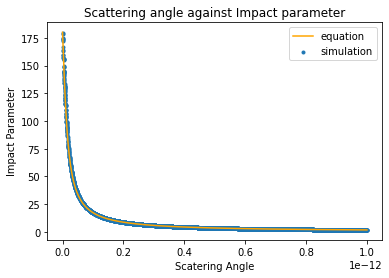

In [370]:
fig = plt.figure()
ax = fig.add_subplot()
plt.title("Scattering angle against Impact parameter")
plt.xlabel("Scatering Angle")
plt.ylabel("Impact Parameter")


ax.scatter(results["offsets"], results["angles"], marker=".", label="simulation")

x = np.linspace(1e-20, 1e-12, 1000)
ax.plot(x, scatterAngle(x), c="orange", label="equation")

ax.legend()
plt.show()

The line fits perfectly with the data, which shows that this equation linking impact parameter and scattering angle is correct. To ensure this, I performed residual analysis on the relationship. This involves calculating the residual for each point, and plotting it against the impact parameter. The residual is calulated as follows:

$$ e = \theta - \hat{\theta} $$

where e is the residual, $\theta$ is the angle from the simulation and $\hat{\theta}$ is the calculated angle.

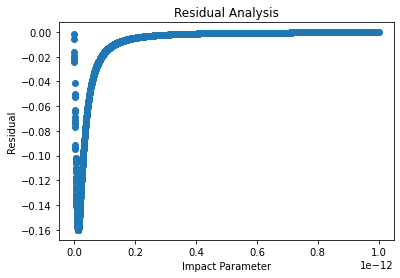

In [371]:
residual = []
for b, angle in zip(results["offsets"], results["angles"]):
    residual.append(angle-scatterAngle(b))

fig = plt.figure()
plt.title("Residual Analysis")
plt.xlabel("Impact Parameter")
plt.ylabel("Residual")
plt.scatter(results["offsets"], residual)
plt.show()

While there is a quirk in the residual at around $10^{-14}$ m, this can probably be explained with how the timestep lines up with the closest approach to the nucleus. Importantly, the max error is only $0.16^{\circ}$, and most are a lot less than that, and so I can confidently conclude the equation described accurately models the relationship between scattering angle and impact parameter.

##### Trajectory

Finally, we can have a look at the trajectory of a single alpha particle, to ensure behaviour is as expected. I will use a value of $b=1.5210857\times 10^{-14}$, as this should produce a $90^{\circ}$ angle, according to the equation.

89.84380427965971


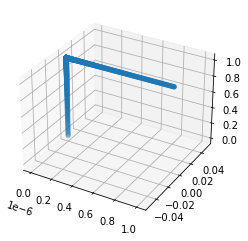

In [113]:
singleSim = goldAtom.singleSim(b=1.5210857e-14)
print(singleSim["angle"])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(singleSim["positions"][...,0], singleSim["positions"][...,1], singleSim["positions"][...,2], marker = "o")
for nucleus in goldAtom.nuclei:
    ax.scatter(nucleus.position[0], nucleus.position[1], nucleus.position[2], marker = "X")
plt.show()

The trajectory of the particle is as expected. If ran seperately the graph is interactive, and the timestep jumps can be seen: these are sufficiently close together for an accurate result. The angle is also only 0.16% off, which is more than accurate enough for our uses.

### 5.2 2D Lattice

The next stage of the simulation is creating a 2D lattice. This is done by setting the thickness of the lattice to 0. With this simulation, we will analyse the accuracy of the original experiments, and the effect the material has on the results. We will use the same initialization data as the single atom simulation, with a couple key differences: rMax and l. Since the scale of the original experiment in terms of the number of atoms is too large to feasibly simulate, I had to compromise and find a balance between accuracy and efficiency. rMax was set to just under half this value, to cover most of the lattice.

I will run a simulation of 1000 particles.

In [146]:
goldLattice = RutherfordSystem(activity=3.7e9, 
                               rMax=2.9e-9, 
                               l=6e-9, 
                               t=0, 
                               d=1e-6, 
                               particleType=ParticleType.ALPHA, 
                               nucleusType=ParticleType.GOLD)

results = goldLattice.multiSim(1000)

#### 5.2.1 Results

##### Lattice

Firstly I will check the formation of the lattice:

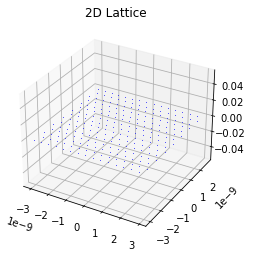

In [159]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
plt.title("2D Lattice")

for nucleus in goldLattice.nuclei:
    plt.scatter(nucleus.position[0], nucleus.position[1], nucleus.position[2], c="blue", marker="X")

plt.show()

I can see that the lattice is formed in the correct shape.

##### Scattering Distribution

Next I can look at the distribution of scattering angles. Again, Rutherford observed that a large majority of particles barely scatter, while a small amount deflect a large angle.

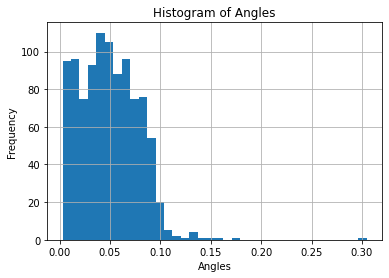

In [160]:
hist = plt.hist(results["angles"], 36)
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('Histogram of Angles')
plt.grid(True)

plt.show()

These results are a lot less conclusive than the single atom. This is because of the limitation of the efficiency of the model; in order to gain more conclusive results, either the length of the lattice or the number of alpha particles would have to be increased, which is not feasible with the time constraints. However, we can still see Rutherford's observations in work here; most angles are below $0.1^{\circ}$, but some reach up to $0.3^{\circ}$. While these are small angles, the same conclusions can be made.

#### 5.2.2 Effect of thickness

To test the effect of thickness, I will run the simulation with lead, heavier than gold, and tin, lighter than gold. Lead should result in more scattering than tin, as it has a higher charge per nucleus. Again, the data for each material is already in the ParticleType Enum.

In [ ]:
goldLattice.changeNucleus(nucleusType=ParticleType.LEAD)
leadResults = goldLattice.multiSim(num=100)

goldLattice.changeNucleus(nucleusType=ParticleType.TIN)
tinResults = goldLattice.multiSim(num=100)

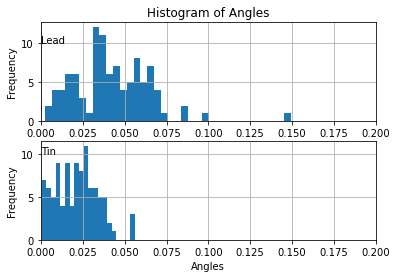

In [301]:
plt.subplot(211)
plt.hist(leadResults["angles"], 36)
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.text(0, 10, "Lead")
plt.title('Histogram of Angles')
plt.xlim(0, 0.2)
plt.grid(True)

plt.subplot(212)
plt.hist(tinResults["angles"], 20)
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.text(0, 10, "Tin")
plt.xlim(0, 0.2)
plt.grid(True)

plt.show()


the scattering of tin is significantly less than that of tin, which is expected. What is interesting here is the distribution of lead scattering is more spread out than tin, rather than just having more particles that scatter more. This makes sense, as all particles feel an electric force even if it is small, so a larger charge and therefore a larger force will spread out the small deflections.

### 5.3 3D Lattice

The final stage of this model is to create a 3D lattice. This is done by setting the thickness and side length of the lattice. In theh original experiment, a thickness of $10^{7}$ m was used. However this translates to ~245 layers, which is too much for the model to simulate. Instead, I will use a thickness of $10^{-9}$ m. The rest of the parameters will be identtical to the 2D lattice simulation. Additionally, I will analyse Rutherford's proposed relationship between thickness and scattering distribution by running smaller tests at varying thicknesses.

In [2]:
goldLattice = RutherfordSystem(activity=3.7e9, 
                               rMax=2.9e-9, 
                               l=6e-9, 
                               t=1e-9, 
                               d=1e-6, 
                               particleType=ParticleType.ALPHA, 
                               nucleusType=ParticleType.GOLD)

results = goldLattice.multiSim(500)

#### 5.3.1 Lattice Visualisation

First, I will check the Lattice arrangement.

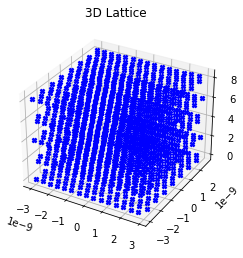

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
plt.title("3D Lattice")


for i in goldLattice.nuclei:
    ax.scatter(i.position[0], i.position[1], i.position[2], c="blue", marker="X")

plt.show()

This is accurate to the face-centered cubic lattice structure of gold, so we can move on.

#### 5.3.2 Scattering Distrtibution

Next, we can look at the scattering distribution of the 3D lattice simulation.

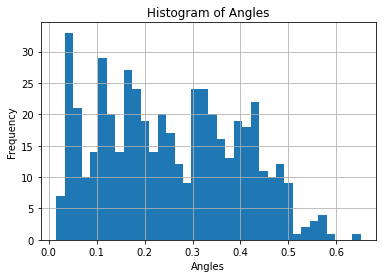

In [5]:
hist = plt.hist(results["angles"], 36)
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('Histogram of Angles')
plt.grid(True)

plt.show()

#####  Observations

Similar to the 2D lattice, the distrtibution is very small due to the constraints, however the standard scattering distribution can still be seen. In addition, the max scattering is larger than with the 2D lattice, as well as being more spread out. With the 2D lattice, most particles were deflected less than 0.1 $^{\circ}$, whereas in this simulation, the same cutoff is at around 0.5 $^{\circ}$. This makes sense as there are more particles to exert force, and the particles cover more area. These results also suggest that Rutherford's prediction that thickness is proportional to scattering is correct; we will investigate this further.

#### 5.3.3 Thickness

Next I will analyse the effect of thickness on scattering distribution. To do this I will run 3 seperate simulations at 1, 2 and 3 nm respecively, and compare the results.

In [ ]:
goldLattice = RutherfordSystem(activity=3.7e9, 
                               rMax=2.9e-9, 
                               l=6e-9, 
                               t=1e-9, 
                               d=1e-6, 
                               particleType=ParticleType.ALPHA, 
                               nucleusType=ParticleType.GOLD)
results1 = goldLattice.multiSim(100)

goldLattice = RutherfordSystem(activity=3.7e9, 
                               rMax=2.9e-9, 
                               l=6e-9, 
                               t=2e-9, 
                               d=1e-6, 
                               particleType=ParticleType.ALPHA, 
                               nucleusType=ParticleType.GOLD)
results2 = goldLattice.multiSim(100)

goldLattice = RutherfordSystem(activity=3.7e9, 
                               rMax=2.9e-9, 
                               l=6e-9, 
                               t=3e-9, 
                               d=1e-6, 
                               particleType=ParticleType.ALPHA, 
                               nucleusType=ParticleType.GOLD)
results3 = goldLattice.multiSim(100)

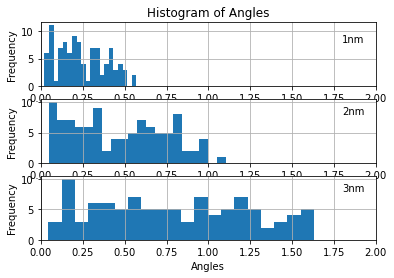

In [40]:
plt.subplot(311)
plt.hist(results1["angles"], 20)
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.text(1.8, 8, "1nm")
plt.title('Histogram of Angles')
plt.xlim(0, 2)
plt.grid(True)

plt.subplot(312)
plt.hist(results2["angles"], 20)
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.text(1.8, 8, "2nm")
plt.xlim(0, 2)
plt.grid(True)

plt.subplot(313)
plt.hist(results3["angles"], 20)
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.text(1.8, 8, "3nm")
plt.xlim(0, 2)
plt.grid(True)

plt.show()

##### Observations

We can see that the larger thickness models produce higher amounts of scattering. This is in line with Rutherford's prediction. Not only that, but we can see some proportionality with the amount of scattering, as the distribution increases linearly with the thickness. This proves the proportional relationship between thickness and amount of scattering.

## 6. Proton Model Extension
***

### 6.1 Analysis

As an extension to the model, I will attempt to model the nucleus as a finite sized shell, with point charge protons distributed within it. This should result in a better model than treating the nucleus as a point charge, as it better represents what is going on in the real world. However, this model is much less efficient, and so I will only model scattering from a single nucleus.

#### 6.1.1 Distribution

Firstl, we need to generate uniformly distributed coordinates within a sphere. the obvious method of doing this is by randomly generating $r, \theta, \phi$ and using these to generate cartesian coordinates, with the following equation:

$$ r = \begin{pmatrix} r \sin(\theta)\cos(\phi) \\  r \sin(\theta)\sin(\phi)  \\  r \cos(\phi) \end{pmatrix} $$

This is done below.

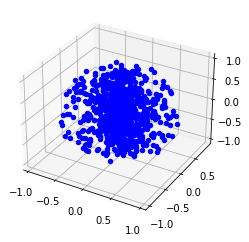

In [307]:
coords =  []
for i in range(1000):
    r = rand.uniform(0, 1)
    theta = rand.uniform(0,2*np.pi)
    phi = rand.uniform(0,2*np.pi)
    coords.append(np.array([r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)]))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for coord in coords:
        ax.scatter(coord[0], coord[1], coord[2], c="blue")
plt.show()

However, as you can see, this places a high bias on the centre and poles of the sphere. To counteract this, firstly the cube root of the normalized radius must be taken. This is because in a sphere, the same difference in angle result in a different seperation and different radii, and so points with smaller radii are clumped together more. the cube root counteracts this effect by making bigger values more likely. In addition to this, to counteract the tendancy to the poles, instead of generating $\theta$, we must generate $\cos\theta$ between -1 and 1, and take the $\arccos$ of that.

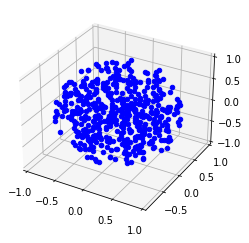

In [314]:
coords  = []

for i in range(500):
    phi = rand.uniform(0,2*np.pi)
    costheta = rand.uniform(-1,1)
    u = rand.uniform(0,1)

    theta = np.arccos(costheta)
    r = 1 * np.cbrt(u)

    coords.append(np.array([r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)]))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for coord in coords:
        ax.scatter(coord[0], coord[1], coord[2], c="blue")
plt.show()

These coordinates are now uniformly distributed throughout the sphere.

### 6.2 Updating the Model

#### 6.2.1 Nucleus Class

We now create the nucleus class, which consists of similar attributes as the particle class, but with the additional attributes, protons and radius. Protons will be a list of particle objects, each with mass 1u and charge 1e, with positions uniformly distributed within a sphere. the radius attribute determines the radius of this sphere, and the position attribute determines its centre.

In [315]:
class Nucleus:

    def __init__(self, mass, charge, position, radius):
        self.mass = mass
        self.charge = charge
        self.position = position
        self.radius = radius
        self.protons = self.createProtons()

    def randomPos(self):
        phi = rand.uniform(0,2*np.pi)
        costheta = rand.uniform(-1,1)
        u = rand.uniform(0,1)

        theta = np.arccos( costheta )
        r = self.radius * np.cbrt( u )

        return np.array([r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)])+self.position

    def createProtons(self):
        protons = []
        for i in range(self.charge):
            protons.append(Particle(mass=1, charge=1, position=self.randomPos(), velocity=np.zeros(3)))
        return protons

#### 6.2.2 Updating netForce

In order for the current model to work with the new nucleus class, we need to change the netForce method in the particle class. At the moment, it calculates the electric force from each nucleus, but we need it to calculate the force from each proton. This is a simple fix, and involves iterating across each proton if the class type is nucleus.

In [316]:
def newNetForce(self, particles):
    force = np.zeros(3)
    for particle in particles:
        if type(particle) == Nucleus:
            for proton in particle.protons:
                forceMag = self.attraction(proton)
                direction = self.position-proton.position
                force += (forceMag/np.linalg.norm(direction))*direction
        else:
            forceMag = self.attraction(particle)
            direction = self.position-particle.position
            force += (forceMag/np.linalg.norm(direction))*direction
    return force

Particle.netForce = newNetForce

#### 6.2.3 Running the models

Now we can initialize the model. I will run 2 simulations; 1 with the standard point nucleus model, and one with the proton model.

In [317]:
protonSim = RutherfordSystem(activity=3.7e9, 
                            rMax=1e-12, 
                            l=0, 
                            t=0, 
                            d=1e-6, 
                            particleType=ParticleType.ALPHA, 
                            nucleusType=ParticleType.GOLD)

nucleusResult = protonSim.multiSim(num=1000)

protonSim.nuclei = [Nucleus(197, 79, np.array([0., 0., 1e-6]), 7e-15)]

protonResult = protonSim.multiSim(num=1000)

### 6.3 Results

#### 6.3.1 Proton Distribution

Firstly, I will check the distribution of protons.

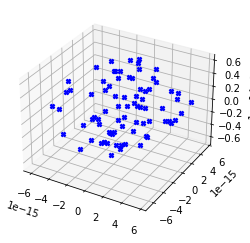

In [319]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for nucleus in protonSim.nuclei:
    for proton in nucleus.protons:
        ax.scatter(proton.position[0], proton.position[1], proton.position[2], c="blue", marker = "X")
plt.show()

They are distributed uniformly, so we can move on to the results.

#### 6.3.2 Scattering Distribution

I will plot the scattering of both the proton model and the nucleus model, so that they can be compared.

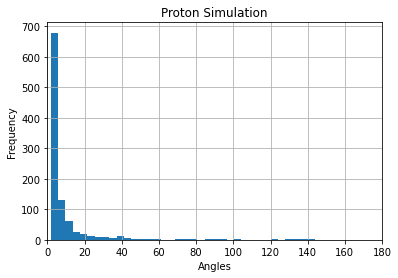

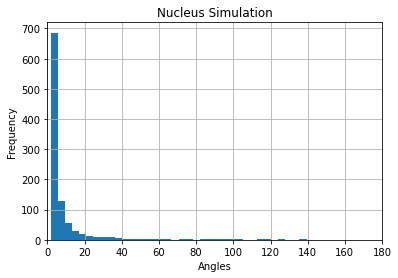

In [332]:
plt.hist(protonResult["angles"], 36)
plt.title("Proton Simulation")
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.xlim(0, 180)
plt.grid(True)

plt.show()

plt.hist(nucleusResult["angles"], 36)
plt.title("Nucleus Simulation")
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.xlim(0, 180)
plt.grid(True)

plt.show()

##### Observations

The 2 models are very similar, both having a majority small angle and a small minority of large angle deflections. This shows us that our original nucleus model is accurate even though it abstracts from reality. This conclusion is very useful, as it allows us to use the much more efficient model for larger scale simulations, such as 3D lattices, without losing much accuracy, and verifies our earlier data. However, we can still continue with our smaller scale analysis on this model.

#### 6.3.3 Differences between Models

We can plot the difference in number of particles for each scattering angle to analyze any differences between the models.

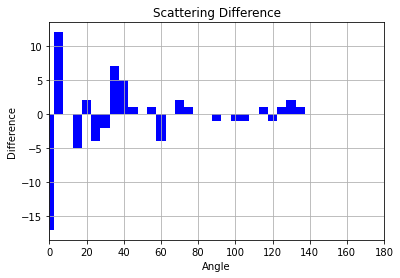

In [363]:
hist1 = np.histogram(protonResult["angles"], bins=np.linspace(0,180,36))
hist2 = np.histogram(nucleusResult["angles"], bins=np.linspace(0,180,36))


for i in range(35):
    plt.bar(i*5, hist1[0][i]-hist2[0][i], width=5, color="blue")
plt.title("Scattering Difference")
plt.xlabel("Angle")
plt.ylabel("Difference")
plt.grid(True)
plt.xlim(0, 180)
plt.show()

Note: positive difference refers to higher number from proton model, and vice versa

##### Observations

One observation we can make from this is that within the majority of small angle deflections, the proton model seems to spread the angles out more, with less in the lowest bin and more in the next one up. This could be due to the radius of the proton model; the nucleus stretches across a larger area rather than just at one point, resulting in slightly higher average deflection. However, the sample size is too small to make a conclusion out of this.

We can also see that the large angle deflections do not change much between the mdoels. We can verify this by calculating the percentage of particles scattered over 90 $^{\circ}$ :

In [364]:
protonOver90 = 0
nucleusOver90 = 0
for i in range(1000):
    if protonResult["angles"][i] > 90:
        protonOver90 += 1
    if nucleusResult["angles"][i] > 90:
        nucleusOver90 += 1

print(f"The nucleus simulation resulted with {nucleusOver90/10}% of particles scattered over 90 degrees.")
print(f"The proton simulation resulted with {protonOver90/10}% of particles scattered over 90 degrees.")

The nucleus simulation resulted with 1.2% of particles scattered over 90 degrees.
The proton simulation resulted with 1.1% of particles scattered over 90 degrees.


These values are almost identical, which shows the new model has little effect on large angle deflections.

#### 6.3.4 Impact Parameter Relationship

Finally, I will compare whether the equation looked at earlier that links scattering angle with impact parameter still holds up with out new model. This is the equation as a reminder:

$$ b(\theta) = \frac{zZe^{2}}{4\pi \epsilon_{0} mv_{0}^{2}}\cot(\frac{\theta}{2}) $$

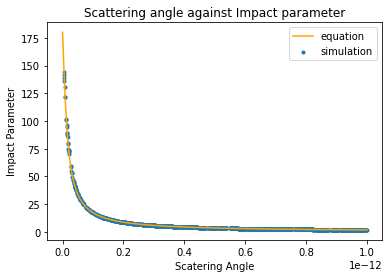

In [330]:
fig = plt.figure()
ax = fig.add_subplot()
plt.title("Scattering angle against Impact parameter")
plt.xlabel("Scatering Angle")
plt.ylabel("Impact Parameter")


ax.scatter(protonResult["offsets"], protonResult["angles"], marker=".", label="simulation")

x = np.linspace(1e-20, 1e-12, 1000)
ax.plot(x, scatterAngle(x), c="orange", label="equation")

ax.legend()
plt.show()

This seems to fit well still. We will perform residual analysis again to check the fit.

##### Residual Analysis

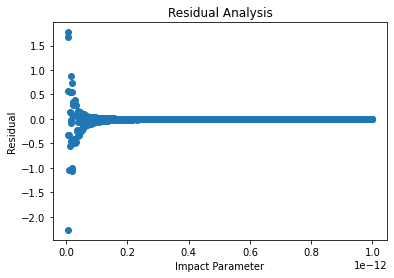

In [331]:
residual = []
for b, angle in zip(protonResult["offsets"], protonResult["angles"]):
    residual.append(angle-scatterAngle(b))

fig = plt.figure()
plt.title("Residual Analysis")
plt.xlabel("Impact Parameter")
plt.ylabel("Residual")
plt.scatter(protonResult["offsets"], residual)
plt.show()

##### Observations

This model still fits well for the majority of impact parameters. However, it starts to break down at very small impact parameters. The distribution is random which shows the proportionality is still accurate, i.e. impact parameter is still proportional to $\cot\frac{\theta}{2}$ , but the maximum error is significantly larger than that of the point charge nucleus model. This makes sense when you realize that to derive the equation, you have to assume that the nucleus acts as a point charge.

## 7. Conclusion
***

This model has succeded at the original task of simulating Rutherford Scattering. It has successfully produced results alligning with Rutherford's, Geiger's and Marsden's original results, and has successfully investigated and proved relationships such as between impact parameter and scattering angle.

### 7.1 Limitations

The main limitation with this model is efficiency. Compromises were made throughout to balance accuracy with efficiency, and that has resulted in less conclusive results than I would have liked. Given unlimited computational power, the model could have ran simulations with parameters similar to the original experiments, such as size of lattice and number of alpha particles, but this was not feasible with what I had. The model was also not able to analyse the 1/8000 full deflection proportion quoted in Rutherford's paper, as not enough alpha particles could be simulated to make reasonable conclusions.

The model certainly could have been made quicker with some optimisations. One that comes to mind is using the GPU to run calculations on multiple alpha particles at once; this has the potential to significanly increase the speed of the simulation. The force calculations could also have been optimised to avoid slow procedures such as rooting a number.

### 7.2 Further Extensions

Given the time and computational power, I would like to extend the proton model to 2D and 3D lattices, to obtain an even more accurate model. On top of this, introducing recoil through Newton's third law on the nuclei would help make the model more realistic. The main problem with this is keeping the shape of the lattice, as in reality forces between electrons help keep them in place; possibly simulating damped harmonic motion on the nuclei could help them keep their position.

## _References_
***

Rutherford, E. (1911). LXXIX. The scattering of α and β particles by matter and the structure of the atom. The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, 21(125), pp.669–688. doi:10.1080/14786440508637080.

Geiger, H. and Marsden, E. (1913). LXI. The laws of deflexion of a particles through large angles. The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, 25(148), pp.604–623. doi:10.1080/14786440408634197.
‌

Ben-Zion, D. (2015). Rutherford Scattering (Discussion 3). [online] Available at: https://courses.physics.ucsd.edu/2016/Spring/physics4e/rutherford.pdf.‌
